# Supplementary (supporting) information

## Load in modules and analysis functions


In [3]:
from simulation import *
from aesthetics import *
from plot import *
prepare_plot()

import glob
import os as os
import re as re
import pandas as pd

%reload_ext autoreload
%autoreload 2
%matplotlib inline
mpl.rc('text', usetex=True)
cmap = sns.color_palette("Paired", 10)

# The exact `matplotlib` version seems to have some minor effect on how many ticks are drawn.
# Some existing figures were computed with `matplotlib` version 1.5.1.
import sys as sys
import matplotlib as mpl
from distutils import ccompiler
import multiprocessing as multiprocessing
import datetime as dt
print('Python', sys.version, end='\n\n')

for item in ('IPython.__version__', 
             'notebook.__version__',
             'numpy.__version__',
             'scipy.__version__',
             'mpl.__version__',
             'numba.__version__',
             'Cython.__version__', 
             'dask.__version__',
             'tifffile.__version__',
            ):
    module, version = item.split('.')
    try:
        lib = sys.modules[module]
    except KeyError:
        try:
            __import__(module)
        except Exception:
            continue
    print(module, getattr(lib, version))

print("\nCompiler type:", ccompiler.new_compiler().compiler_type, end='\n\n')
print(multiprocessing.cpu_count(), "CPU cores")

try:
    import psutil
    print("{:.0f} GB main memory\n".format(psutil.virtual_memory()[0] / 2**30))
except ImportError:
    pass
    
print(dt.datetime.now())

Python 3.6.0 |Anaconda 4.3.0 (64-bit)| (default, Dec 23 2016, 12:22:00) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]

IPython 5.1.0
notebook 4.3.1
numpy 1.11.3
scipy 0.18.1
numba 0.30.1
Cython 0.25.2
dask 0.13.0

Compiler type: unix

12 CPU cores
23 GB main memory

2017-05-01 08:04:39.417661


# Parameter sensitivity

## What is the effect of the diffusion coefficient on the values of flux we report?

First, here is the directional and reciprocating flux reported for a typical angle using `D = 3 * 10 ** 12 degree**2 per second` which is the default value specified in the class `Simulation`.

C                         +1.00e+06  second**-1
D                         +3.00e+12  degrees**2 second**-1
k_{cat}                   +3.12e+02  second**-1
[S]                       +2.50e-06  M         
dt                        +1.00e-12  second    
-------------------------
Intrasurface flux         -1.20e+00  cycle second**-1
Peak                      +2.19e-01  cycle second**-1


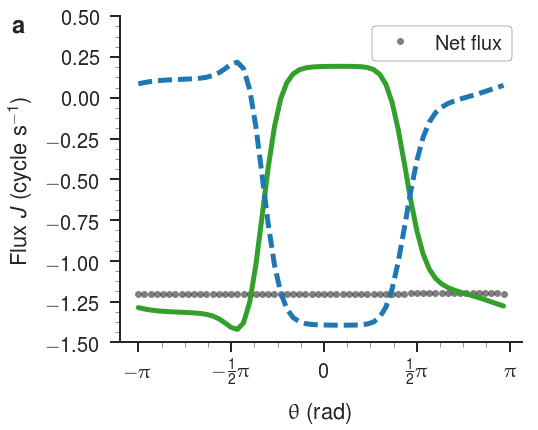

In [77]:
this = Simulation(data_source='adk_md_data')
this.name = 'chi2THR175'
this.simulate()
plot_flux(this)
ax = plt.gca()
ax.set_ylim([-1.5, 0.5])
panel_label('a', panel_xoffset=-0.27)

We can increase the value of the diffusion coefficient by explicitly writing it before calling `simulate()`. If we increase the value of `D` to `3 * 10 ** 15 degree**2 per second`, then we see significant numerical noise. For example:

C                         +1.00e+06  second**-1
D                         +3.00e+15  degrees**2 second**-1
k_{cat}                   +3.12e+02  second**-1
[S]                       +2.50e-06  M         
dt                        +1.00e-15  second    
-------------------------
Intrasurface flux         -1.11e+00  cycle second**-1
Peak                      +2.20e-01  cycle second**-1


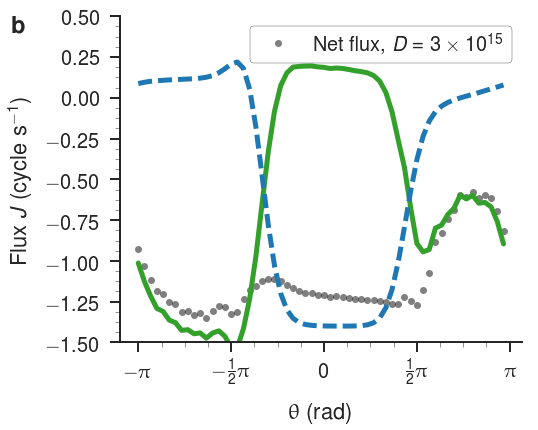

In [83]:
this = Simulation(data_source='adk_md_data')
this.name = 'chi2THR175'
this.D = 3 * 10 ** 15
this.simulate()
plot_flux(this)
ax = plt.gca()
ax.set_ylim([-1.5, 0.5])

handles, labels = ax.get_legend_handles_labels()
ax.legend([handles[0]], [r'Net flux, $D = 3 \times 10^{{15}}$'], frameon=True, framealpha=1.0, edgecolor='k', loc=1)
panel_label('b', panel_xoffset=-0.27)

C                         +1.00e+13  second**-1
D                         +3.00e+12  degrees**2 second**-1
k_{cat}                   +3.12e+02  second**-1
[S]                       +2.50e-06  M         
dt                        +1.00e-12  second    
-------------------------
Intrasurface flux         -8.99e-02  cycle second**-1
Peak                      +4.21e+00  cycle second**-1


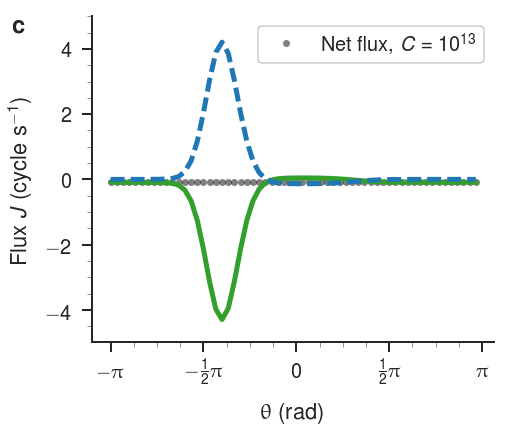

In [141]:
this = Simulation(data_source='adk_md_data')
this.name = 'chi2THR175'
this.C_intersurface = 10**13
this.simulate()
plot_flux(this)
ax = plt.gca()
ax.set_ylim([-5, 5])

handles, labels = ax.get_legend_handles_labels()
ax.legend([handles[0]], [r'Net flux, $C = 10^{{13}}$'], frameon=True, framealpha=1.0, edgecolor='k', loc=1)
panel_label('c', panel_xoffset=-0.2)

The onset of noise can be see by plotting the directional flux as a function of the value of `D`. First, let's calculate the mean (for a given angle) of the directional flux as a function fo `D`.

In [90]:
powers_of_ten = np.arange(5, 15, 0.2)
mean_flux = np.zeros((len(powers_of_ten)))
for index, value in enumerate(powers_of_ten):
    this = Simulation(data_source='adk_md_data')
    this.name = 'chi2THR175'
    this.D = 3 * 10 ** value
    this.simulate()
    mean_flux[index] = np.mean(this.flux_u + this.flux_b)

/media/dslochower/data-beta/projects/nonequilibrium-manuscript/simulation.py:244: ComplexWarning: Casting complex values to real discards the imaginary part
  ss = abs(eigenvectors[:, self.eigenvalues.argmax()].astype(float))


(-1.5, 0.1)

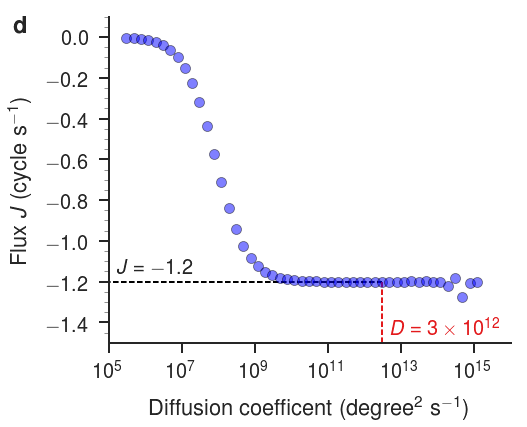

In [91]:
ax = generic_plot([3 * 10 ** i for i in powers_of_ten], mean_flux, 
                  xlabel='Diffusion coefficent (degree$^{{2}}$ s$^{{-1}}$)',
                 ylabel='Flux $J$ (cycle s$^{{-1}}$)',
                 panel_label='d')
ax.set_xscale('log')

ax.hlines(y=-1.2, xmin=0, xmax=3*10**12, color='k', linestyles='--', zorder=-2, lw=2)
ax.annotate(r'$J = -1.2$', xy=(10**5, 0.1), xytext=(10**5.2, -1.15), fontsize=20)

ax.vlines(x=3*10**12, ymin=-1.5, ymax=-1.2, color=cmap[5], linestyles='--', zorder=-1, lw=2)
ax.annotate(r'$D = 3 \times 10^{{12}}$', color=cmap[5], xy=(3*10**12, 0.0), xytext=(5*10**12, -1.45), fontsize=20)

ax.set_xlim([10**5, 10**16])
ax.set_ylim([-1.5, 0.1])

From about $10^{9}$ thorugh $10^{14}$, the results look stable.

## What is the effect of the bimolecular rate coefficient on the flux?

Like the diffusion coefficient, very high values of this parameter leads to numerical instability. Unlike the diffusion coefficient, this parameter is different for each system. For ADK, `C = 10 ** 6 per mole per second`.

In [92]:
powers_of_ten = np.arange(1, 14, 0.2)
mean_flux = np.zeros((len(powers_of_ten)))
population_bound = np.zeros((len(powers_of_ten)))
population_apo = np.zeros((len(powers_of_ten)))
for index, value in enumerate(powers_of_ten):
    this = Simulation(data_source='adk_md_data')
    this.name = 'chi2THR175'
    this.C_intersurface = 10 ** value
    this.simulate()
    mean_flux[index] = np.mean(this.flux_u + this.flux_b)
    population_bound[index] = np.sum(this.ss[0:this.bins])
    population_apo[index] = np.sum(this.ss[this.bins:2 * this.bins])

(-6, 1)

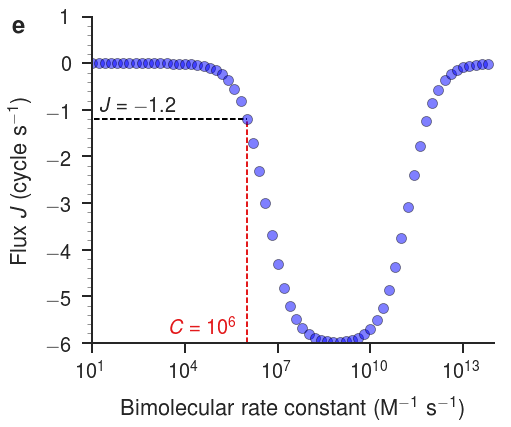

In [93]:
ax = generic_plot([10 ** i for i in powers_of_ten], mean_flux, 
                  xlabel='Bimolecular rate constant (M$^{{-1}}$ s$^{{-1}}$)',
                 ylabel='Flux $J$ (cycle s$^{{-1}}$)',
                 panel_label='e', panel_xoffset=-0.2)


ax.hlines(y=-1.2, xmin=0, xmax=10**6, color='k', linestyles='--', zorder=-2, lw=2)
ax.annotate(r'$J = -1.2$', xy=(10**1.2, -1), xytext=(10**1.2, -1), fontsize=20)

ax.vlines(x=10**6, ymin=-6, ymax=-1.2, color=cmap[5], linestyles='--', zorder=-1, lw=2)
ax.annotate(r'$C = 10^{{6}}$', color=cmap[5], xy=(10**3.5, 0.0), xytext=(10**3.5, -5.8), fontsize=20)

ax.set_xscale('log')
ax.set_xlim([10**1, 10**14])
ax.set_ylim([-6, 1])

At low values of `C`, the bound state is not populated. At high values of `C`, the unbound state is not populated.

# Diffusion

In [155]:
def gaussian(x, mu, sig):
    """ Returns a Gaussian curve. """
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

def calculate_msd(population, mu):
    msd = []
    for position in range(2 * this.bins):
        msd.append(population[position] *
                   ((position - mu) * (360 / this.bins)) ** 2)
    return np.sum(msd)

def iterate(this, iterations):
    # Start with a Gaussian population distribution.
    population = np.array([gaussian(i, this.bins / 2, 2) for i in range(2 * this.bins)])
    row_sums = population.sum(axis=0, keepdims=True)
    population = population / row_sums

    # Now, keep track of the center of mass of the population as it evolves.
    this.iterative_com = []
    this.iterative_com.append(sc.ndimage.measurements.center_of_mass(population))
    
    new_population = np.copy(population)
    this.populations = np.empty((len(population), iterations + 1))
    this.msd = np.empty((iterations + 1))
    this.msd[0] = calculate_msd(population, this.bins / 2)
    this.populations[:, 0] = population
    for i in range(iterations):
        new_population = np.dot(new_population, this.tm)
        this.msd[i + 1] = calculate_msd(new_population, this.bins / 2)
        this.iterative_com.append(sc.ndimage.measurements.center_of_mass(new_population))
        this.populations[:, i+1] = new_population
    return

In [156]:
this = Simulation(data_source='manual')
this.bins = 60
this.unbound = np.array([0] * this.bins)
this.bound = np.array([0] * this.bins)
this.offset_factor = 0.0
this.C_intersurface = 1
this.catalytic_rate = 1
this.cSubstrate = 1
this.simulate(user_energies=True)
iterate(this, 100)

Using manual parameters, specify C, offset, and catalytic rate.


/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/lines.py:1206: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


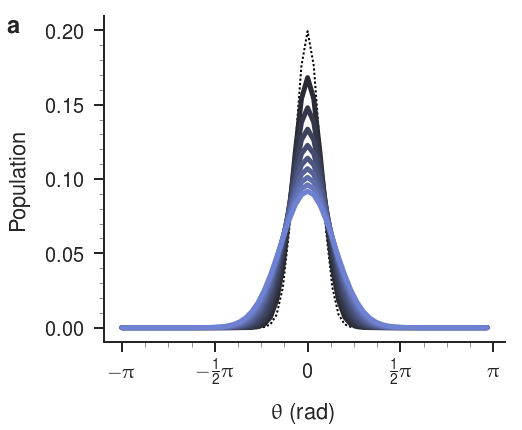

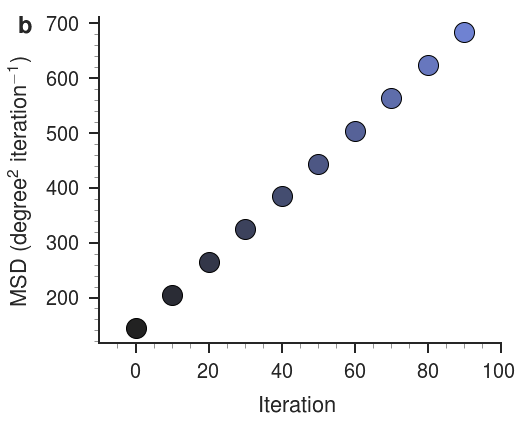

In [166]:
cmap = sns.dark_palette((260, 75, 60), input="husl", n_colors=100)

fig = plt.figure(figsize=(6 * 1.2, 6))
ax = fig.add_subplot(111)
ax.plot(range(60), this.populations[0:60, 0], c='k', alpha=1, ls=':', lw=2)
for i in np.arange(10, 100, 10):
    ax.plot(range(60), this.populations[0:60, i], c=cmap[i], alpha=1)
ax.set_xticks([0, 60 / 4, 60 / 2, 3 * 60 / 4, 60])
ax.set_xticklabels([r'$-\pi$', r'$-\frac{1}{2}\pi{}$', r'$0$', r'$\frac{1}{2}\pi$', r'$\pi$'])
ax.set_xlabel(r'$\theta$ (rad)')
ax.set_ylabel(r'Population')
paper_plot(fig)
panel_label('a', panel_xoffset=-0.24)


fig = plt.figure(figsize=(6 * 1.2, 6))
ax = fig.add_subplot(111)
for i in np.arange(0, 100, 10):
    ax.plot(i, this.msd[i], 'o', markersize=20, markeredgecolor='k', markeredgewidth=1, alpha=1, mfc=cmap[i]) 
ax.set_xlabel('Iteration')
ax.set_ylabel('MSD (degree$^{{2}}$ iteration$^{{-1}}$)')
ax.set_xlim([-10,100])
panel_label('b', panel_xoffset=-0.2)
paper_plot(fig)

# How does changing the catalytic rate change the flux results?

In [106]:
catalytic_rates = np.arange(0, 1000, 10)
mean_flux = np.zeros((len(catalytic_rates)))
for index, value in enumerate(catalytic_rates):
    this = Simulation(data_source='adk_md_data')
    this.name = 'chi2THR175'
    this.catalytic_rate = value
    this.simulate()
    mean_flux[index] = np.mean(this.flux_u + this.flux_b)

(-2, 1)

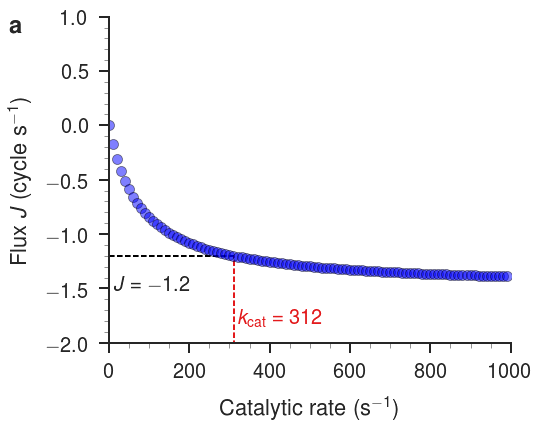

In [121]:
ax = generic_plot(catalytic_rates, mean_flux, 
                 xlabel='Catalytic rate (s$^{{-1}}$)',
                 ylabel='Flux $J$ (cycle s$^{{-1}}$)',
                 panel_label='a', panel_xoffset=-0.25)


ax.hlines(y=-1.2, xmin=0, xmax=312, color='k', linestyles='--', zorder=-2, lw=2)
ax.annotate(r'$J = -1.2$', xy=(10, -1.5), xytext=(10, -1.5), fontsize=20)

ax.vlines(x=312, ymin=-6, ymax=-1.2, color=cmap[5], linestyles='--', zorder=-1, lw=2)
ax.annotate(r'$k_\text{{cat}} = 312$', color=cmap[5], xy=(312, 0.0), xytext=(320, -1.85), fontsize=20)

ax.set_xlim([0, 1000])
ax.set_ylim([-2, 1])

# And the offset?

In [128]:
offsets = np.arange(-10, 10, 0.2)
mean_flux = np.zeros((len(offsets)))
for index, value in enumerate(offsets):
    this = Simulation(data_source='adk_md_data')
    this.name = 'chi2THR175'
    this.offset_factor = value
    this.simulate()
    mean_flux[index] = np.mean(this.flux_u + this.flux_b)

(-2, 1)

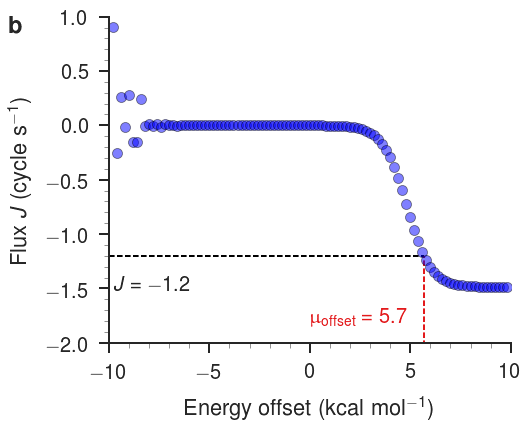

In [143]:
ax = generic_plot(offsets, mean_flux, 
                 xlabel='Energy offset (kcal mol$^{{-1}}$)',
                 ylabel='Flux $J$ (cycle s$^{{-1}}$)',
                 panel_label='b', panel_xoffset=-0.25)


ax.hlines(y=-1.2, xmin=-10, xmax=5.7, color='k', linestyles='--', zorder=-2, lw=2)
ax.annotate(r'$J = -1.2$', xy=(-9.8, -1.5), xytext=(-9.8, -1.5), fontsize=20)

ax.vlines(x=5.7, ymin=-6, ymax=-1.2, color=cmap[5], linestyles='--', zorder=-1, lw=2)
ax.annotate(r'$\mu_\text{{offset}} = 5.7$', color=cmap[5], xy=(4, -2), xytext=(0, -1.85), fontsize=20)

ax.set_xlim([-10, 10])
ax.set_ylim([-2, 1])

# Velocity plot with all curves

In [4]:
adk_312 = pd.read_pickle('adk-concentration-scan.pickle')
concentrations = [10**i for i in np.unique(adk_312['Concentration'].values)]
adk_files = np.unique(adk_312['File'].values)

In [23]:
adk_312_directional_fluxes = []
adk_312_reciprocating_fluxes = []
for file in adk_files:
    directional_flux, reciprocating_flux, velocity = return_fluxes_and_velocity('adk_md_data', file, concentrations)    
    if file == 'chi2THR175':
        print(directional_flux[-1])
    adk_312_directional_fluxes.append(directional_flux)
    adk_312_reciprocating_fluxes.append(reciprocating_flux)

-184.413543382


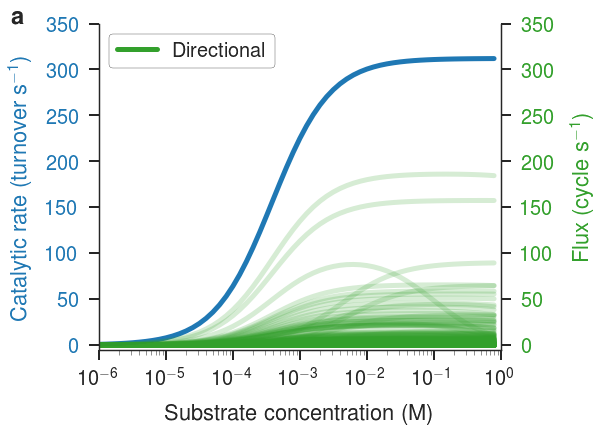

In [27]:
cmap = sns.color_palette("Paired", 10)
fig = plt.figure(figsize=(6 * 1.2, 6))
gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
ax1 = plt.subplot(gs[0, 0])

ax1.plot(concentrations, velocity, c=cmap[1])
ax1.set_xscale('log')
ax1.set_ylabel(r'Catalytic rate (turnover s$^{{-1}}$)', color=cmap[1])
ax1.set_ylim([-5, 350])
ax2 = ax1.twinx()

for j in range(len(adk_files)):
       ax2.plot(concentrations, [abs(i) for i in adk_312_directional_fluxes[j]], c=cmap[3], alpha=0.2)

#ax2.plot([[i for i in list(concentrations)] for j in range(len(adk_files))], [[abs(i) for i in j] for j in directional_fluxes], c=cmap[3], alpha=1)
#ax2.plot([[i for i in list(concentrations)] for j in range(len(adk_files))], [[abs(i) for i in j] for j in directional_fluxes], c=cmap[3], ls='--', alpha=0.1)
ax2.set_ylabel('Flux (cycle s$^{{-1}}$)', color=cmap[3])
ax2.set_ylim([-5, 350])
for tl in ax1.get_yticklabels():
    tl.set_color(cmap[1])
for tl in ax2.get_yticklabels():
    tl.set_color(cmap[3])
ax1.set_xlabel('Substrate concentration (M)')
for ax in fig.axes:
    ax.tick_params(which='major', direction='out', length=10, pad=10)
    ax.tick_params(which='minor', direction='out', length=5)
    ax.xaxis.set_tick_params(width=2)
    ax.yaxis.set_tick_params(width=2)
    ax.xaxis.set_ticks_position('bottom')
    ax.spines["top"].set_visible(False)
    ax.xaxis.labelpad = 15
    ax.yaxis.labelpad = 15
threshold_labels = ['Directional']
linestyles = ['-', '--']
colors = [cmap[3], cmap[3]]
handles, labels = ax.get_legend_handles_labels()
display = (0, 1, 2)
artists = []
if threshold_labels:
    for threshold_label, style, c in zip(threshold_labels, linestyles, colors):
        artists.append(plt.Line2D((0, 1), (0, 0), color=c, linestyle=style))
    ax.legend([handle for i, handle in enumerate(handles) if i in display] + artists,
              [label for i, label in enumerate(labels) if i in display] + threshold_labels,
              loc='upper left', frameon=True, framealpha=1.0, edgecolor='k')

ax1.set_xlim([10**-6, 10**0])
ax1.set_xticks([10**-6, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 10**0])
fig.patch.set_facecolor('white')
panel_label('a', panel_xoffset=-0.22, panel_yoffset=1.0)

## Let's make this plot only show angles with high reciprocating flux and low directional flux.

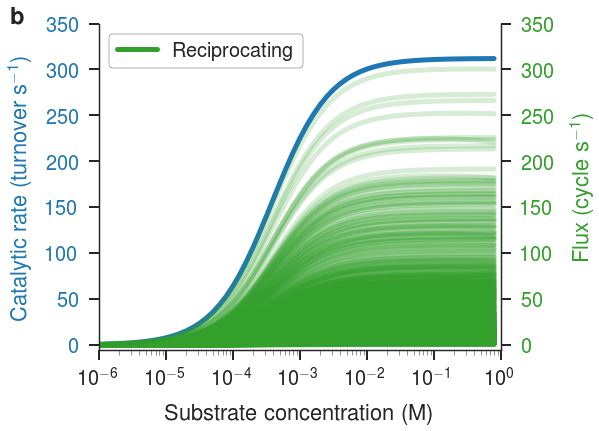

In [28]:
cmap = sns.color_palette("Paired", 10)
fig = plt.figure(figsize=(6 * 1.2, 6))
gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
ax1 = plt.subplot(gs[0, 0])

ax1.plot(concentrations, velocity, c=cmap[1])
ax1.set_xscale('log')
ax1.set_ylabel(r'Catalytic rate (turnover s$^{{-1}}$)', color=cmap[1])
ax1.set_ylim([-5, 350])
ax2 = ax1.twinx()

for j in range(len(adk_files)):
       directional_maximum = max([abs(i) for i in adk_312_directional_fluxes[j]])
       ax2.plot(concentrations, [abs(i) if directional_maximum < 1 else None for i in adk_312_reciprocating_fluxes[j]], c=cmap[3], alpha=0.2)

ax2.set_ylabel('Flux (cycle s$^{{-1}}$)', color=cmap[3])
ax2.set_ylim([-5, 350])
for tl in ax1.get_yticklabels():
    tl.set_color(cmap[1])
for tl in ax2.get_yticklabels():
    tl.set_color(cmap[3])
ax1.set_xlabel('Substrate concentration (M)')
for ax in fig.axes:
    ax.tick_params(which='major', direction='out', length=10, pad=10)
    ax.tick_params(which='minor', direction='out', length=5)
    ax.xaxis.set_tick_params(width=2)
    ax.yaxis.set_tick_params(width=2)
    ax.xaxis.set_ticks_position('bottom')
    ax.spines["top"].set_visible(False)
    ax.xaxis.labelpad = 15
    ax.yaxis.labelpad = 15
threshold_labels = ['Reciprocating']
linestyles = ['-', '--']
colors = [cmap[3], cmap[3]]
handles, labels = ax.get_legend_handles_labels()
display = (0, 1, 2)
artists = []
if threshold_labels:
    for threshold_label, style, c in zip(threshold_labels, linestyles, colors):
        artists.append(plt.Line2D((0, 1), (0, 0), color=c, linestyle=style))
    ax.legend([handle for i, handle in enumerate(handles) if i in display] + artists,
              [label for i, label in enumerate(labels) if i in display] + threshold_labels,
              loc='upper left', frameon=True, framealpha=1.0, edgecolor='k')
ax1.set_xlim([10**-6, 10**0])
ax1.set_xticks([10**-6, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 10**0])
fig.patch.set_facecolor('white')
panel_label('b', panel_xoffset=-0.22, panel_yoffset=1.0)

## PKA

In [29]:
pka_140 = pd.read_pickle('pka-concentration-scan.pickle')
concentrations = [10**i for i in np.unique(pka_140['Concentration'].values)]
pka_files = np.unique(pka_140['File'].values)

pka_140_directional_fluxes = []
pka_140_reciprocating_fluxes = []
for file in pka_files:
    directional_flux, reciprocating_flux, velocity = return_fluxes_and_velocity('pka_md_data', file, concentrations)    
    pka_140_directional_fluxes.append(directional_flux)
    pka_140_reciprocating_fluxes.append(reciprocating_flux)

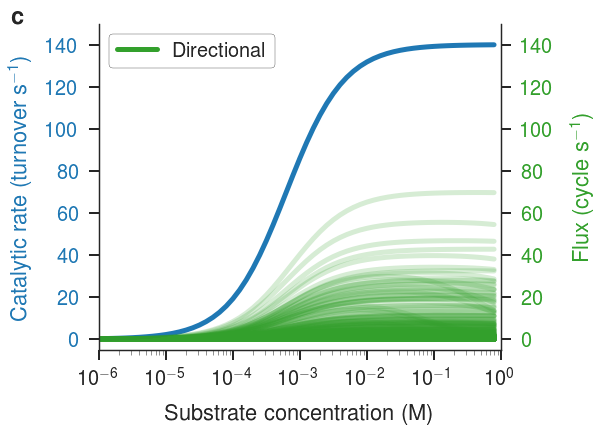

In [30]:
cmap = sns.color_palette("Paired", 10)
fig = plt.figure(figsize=(6 * 1.2, 6))
gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
ax1 = plt.subplot(gs[0, 0])

ax1.plot(concentrations, velocity, c=cmap[1])
ax1.set_xscale('log')
ax1.set_ylabel(r'Catalytic rate (turnover s$^{{-1}}$)', color=cmap[1])
ax1.set_ylim([-5, 150])
ax2 = ax1.twinx()

for j in range(len(pka_files)):
       ax2.plot(concentrations, [abs(i) for i in pka_140_directional_fluxes[j]], c=cmap[3], alpha=0.2)

#ax2.plot([[i for i in list(concentrations)] for j in range(len(adk_files))], [[abs(i) for i in j] for j in directional_fluxes], c=cmap[3], alpha=1)
#ax2.plot([[i for i in list(concentrations)] for j in range(len(adk_files))], [[abs(i) for i in j] for j in directional_fluxes], c=cmap[3], ls='--', alpha=0.1)
ax2.set_ylabel('Flux (cycle s$^{{-1}}$)', color=cmap[3])
ax2.set_ylim([-5, 150])
for tl in ax1.get_yticklabels():
    tl.set_color(cmap[1])
for tl in ax2.get_yticklabels():
    tl.set_color(cmap[3])
ax1.set_xlabel('Substrate concentration (M)')
for ax in fig.axes:
    ax.tick_params(which='major', direction='out', length=10, pad=10)
    ax.tick_params(which='minor', direction='out', length=5)
    ax.xaxis.set_tick_params(width=2)
    ax.yaxis.set_tick_params(width=2)
    ax.xaxis.set_ticks_position('bottom')
    ax.spines["top"].set_visible(False)
    ax.xaxis.labelpad = 15
    ax.yaxis.labelpad = 15
threshold_labels = ['Directional']
linestyles = ['-', '--']
colors = [cmap[3], cmap[3]]
handles, labels = ax.get_legend_handles_labels()
display = (0, 1, 2)
artists = []
if threshold_labels:
    for threshold_label, style, c in zip(threshold_labels, linestyles, colors):
        artists.append(plt.Line2D((0, 1), (0, 0), color=c, linestyle=style))
    ax.legend([handle for i, handle in enumerate(handles) if i in display] + artists,
              [label for i, label in enumerate(labels) if i in display] + threshold_labels,
              loc='upper left', frameon=True, framealpha=1.0, edgecolor='k')

ax1.set_xlim([10**-6, 10**0])
ax1.set_xticks([10**-6, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 10**0])
panel_label('c', panel_xoffset=-0.22, panel_yoffset=1.0)
fig.patch.set_facecolor('white')

## Let's make this plot only show angles with high reciprocating flux and low directional flux.

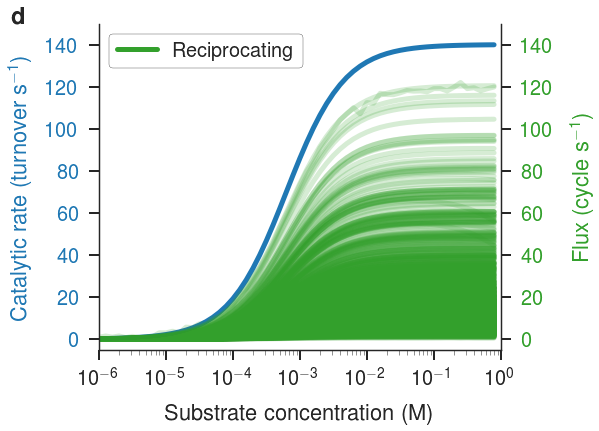

In [31]:
cmap = sns.color_palette("Paired", 10)
fig = plt.figure(figsize=(6 * 1.2, 6))
gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
ax1 = plt.subplot(gs[0, 0])

ax1.plot(concentrations, velocity, c=cmap[1])
ax1.set_xscale('log')
ax1.set_ylabel(r'Catalytic rate (turnover s$^{{-1}}$)', color=cmap[1])
ax1.set_ylim([-5, 150])
ax2 = ax1.twinx()

for j in range(len(pka_files)):
       directional_maximum = max([abs(i) for i in pka_140_directional_fluxes[j]])
       ax2.plot(concentrations, [abs(i) if directional_maximum < 1 else None for i in pka_140_reciprocating_fluxes[j]], c=cmap[3], alpha=0.2)

ax2.set_ylabel('Flux (cycle s$^{{-1}}$)', color=cmap[3])
ax2.set_ylim([-5, 150])
for tl in ax1.get_yticklabels():
    tl.set_color(cmap[1])
for tl in ax2.get_yticklabels():
    tl.set_color(cmap[3])
ax1.set_xlabel('Substrate concentration (M)')
for ax in fig.axes:
    ax.tick_params(which='major', direction='out', length=10, pad=10)
    ax.tick_params(which='minor', direction='out', length=5)
    ax.xaxis.set_tick_params(width=2)
    ax.yaxis.set_tick_params(width=2)
    ax.xaxis.set_ticks_position('bottom')
    ax.spines["top"].set_visible(False)
    ax.xaxis.labelpad = 15
    ax.yaxis.labelpad = 15
threshold_labels = ['Reciprocating']
linestyles = ['-', '--']
colors = [cmap[3], cmap[3]]
handles, labels = ax.get_legend_handles_labels()
display = (0, 1, 2)
artists = []
if threshold_labels:
    for threshold_label, style, c in zip(threshold_labels, linestyles, colors):
        artists.append(plt.Line2D((0, 1), (0, 0), color=c, linestyle=style))
    ax.legend([handle for i, handle in enumerate(handles) if i in display] + artists,
              [label for i, label in enumerate(labels) if i in display] + threshold_labels,
              loc='upper left', frameon=True, framealpha=1.0, edgecolor='k')
ax1.set_xlim([10**-6, 10**0])
ax1.set_xticks([10**-6, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 10**0])
fig.patch.set_facecolor('white')
panel_label('d', panel_xoffset=-0.22, panel_yoffset=1.0)

## HIVP

In [19]:
hiv_10 = pd.read_pickle('hiv-concentration-scan-catalytic-rate-10.pickle')
concentrations = [10**i for i in np.unique(hiv_10['Concentration'].values)]
hiv_10_files = np.unique(hiv_10['File'].values)

directional_fluxes = []
reciprocating_fluxes = []
for file in tqdm(range(len(hiv_10_files))):
    directional_flux, reciprocating_flux, velocity = return_fluxes_and_velocity('hiv_md_data', hiv_10_files[file], concentrations)    
    directional_fluxes.append(directional_flux)
    reciprocating_fluxes.append(reciprocating_flux)

100%|██████████| 815/815 [10:02<00:00,  1.34it/s]


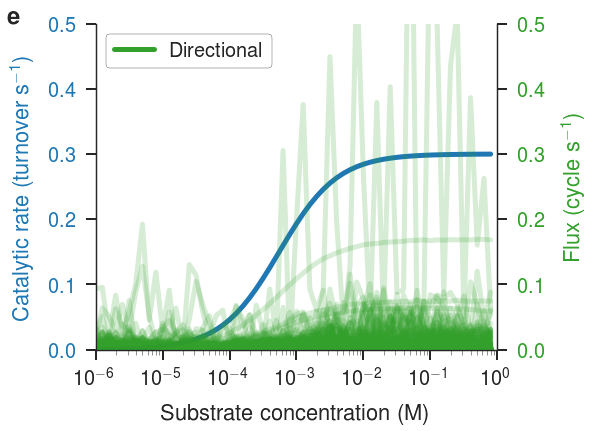

In [24]:
cmap = sns.color_palette("Paired", 10)
fig = plt.figure(figsize=(6 * 1.2, 6))
gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
ax1 = plt.subplot(gs[0, 0])

ax1.plot(concentrations, velocity, c=cmap[1])
ax1.set_xscale('log')
ax1.set_ylabel(r'Catalytic rate (turnover s$^{{-1}}$)', color=cmap[1])
ax1.set_ylim([0, 0.5])
ax2 = ax1.twinx()

for j in range(len(hiv_10_files)):
       ax2.plot(concentrations, [abs(i) for i in directional_fluxes[j]], c=cmap[3], alpha=0.2)

#ax2.plot([[i for i in list(concentrations)] for j in range(len(adk_files))], [[abs(i) for i in j] for j in directional_fluxes], c=cmap[3], alpha=1)
#ax2.plot([[i for i in list(concentrations)] for j in range(len(adk_files))], [[abs(i) for i in j] for j in directional_fluxes], c=cmap[3], ls='--', alpha=0.1)
ax2.set_ylabel('Flux (cycle s$^{{-1}}$)', color=cmap[3])
ax2.set_ylim([0, 0.5])
for tl in ax1.get_yticklabels():
    tl.set_color(cmap[1])
for tl in ax2.get_yticklabels():
    tl.set_color(cmap[3])
ax1.set_xlabel('Substrate concentration (M)')
for ax in fig.axes:
    ax.tick_params(which='major', direction='out', length=10, pad=10)
    ax.tick_params(which='minor', direction='out', length=5)
    ax.xaxis.set_tick_params(width=2)
    ax.yaxis.set_tick_params(width=2)
    ax.xaxis.set_ticks_position('bottom')
    ax.spines["top"].set_visible(False)
    ax.xaxis.labelpad = 15
    ax.yaxis.labelpad = 15
threshold_labels = ['Directional']
linestyles = ['-', '--']
colors = [cmap[3], cmap[3]]
handles, labels = ax.get_legend_handles_labels()
display = (0, 1, 2)
artists = []
if threshold_labels:
    for threshold_label, style, c in zip(threshold_labels, linestyles, colors):
        artists.append(plt.Line2D((0, 1), (0, 0), color=c, linestyle=style))
    ax.legend([handle for i, handle in enumerate(handles) if i in display] + artists,
              [label for i, label in enumerate(labels) if i in display] + threshold_labels,
              loc='upper left', frameon=True, framealpha=1.0, edgecolor='k')

ax1.set_xlim([10**-6, 10**0])
ax1.set_xticks([10**-6, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 10**0])
panel_label('e', panel_xoffset=-0.22, panel_yoffset=1.0)
fig.patch.set_facecolor('white')

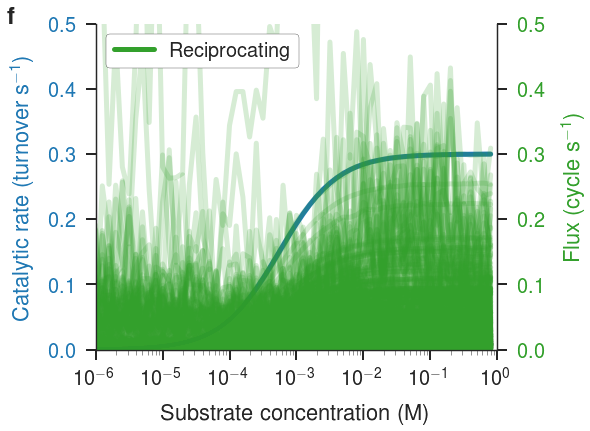

In [26]:

cmap = sns.color_palette("Paired", 10)
fig = plt.figure(figsize=(6 * 1.2, 6))
gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
ax1 = plt.subplot(gs[0, 0])

ax1.plot(concentrations, velocity, c=cmap[1])
ax1.set_xscale('log')
ax1.set_ylabel(r'Catalytic rate (turnover s$^{{-1}}$)', color=cmap[1])
ax1.set_ylim([0, 0.5])
ax2 = ax1.twinx()

for j in range(len(hiv_10_files)):
       ax2.plot(concentrations, [abs(i) for i in reciprocating_fluxes[j]], c=cmap[3], alpha=0.2)

ax2.set_ylabel('Flux (cycle s$^{{-1}}$)', color=cmap[3])
ax2.set_ylim([0, 0.5])
for tl in ax1.get_yticklabels():
    tl.set_color(cmap[1])
for tl in ax2.get_yticklabels():
    tl.set_color(cmap[3])
ax1.set_xlabel('Substrate concentration (M)')
for ax in fig.axes:
    ax.tick_params(which='major', direction='out', length=10, pad=10)
    ax.tick_params(which='minor', direction='out', length=5)
    ax.xaxis.set_tick_params(width=2)
    ax.yaxis.set_tick_params(width=2)
    ax.xaxis.set_ticks_position('bottom')
    ax.spines["top"].set_visible(False)
    ax.xaxis.labelpad = 15
    ax.yaxis.labelpad = 15
threshold_labels = ['Reciprocating']
linestyles = ['-', '--']
colors = [cmap[3], cmap[3]]
handles, labels = ax.get_legend_handles_labels()
display = (0, 1, 2)
artists = []
if threshold_labels:
    for threshold_label, style, c in zip(threshold_labels, linestyles, colors):
        artists.append(plt.Line2D((0, 1), (0, 0), color=c, linestyle=style))
    ax.legend([handle for i, handle in enumerate(handles) if i in display] + artists,
              [label for i, label in enumerate(labels) if i in display] + threshold_labels,
              loc='upper left', frameon=True, framealpha=1.0, edgecolor='k')
ax1.set_xlim([10**-6, 10**0])
ax1.set_xticks([10**-6, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 10**0])
panel_label('f', panel_xoffset=-0.22, panel_yoffset=1.0)
fig.patch.set_facecolor('white')

In [20]:
hiv_200 = pd.read_pickle('hiv-concentration-scan-catalytic-rate-200.pickle')
concentrations = [10**i for i in np.unique(hiv_200['Concentration'].values)]
hiv_200_files = np.unique(hiv_200['File'].values)

directional_fluxes = []
reciprocating_fluxes = []
for file in tqdm(range(len(hiv_200_files))):
    directional_flux, reciprocating_flux, velocity = return_fluxes_and_velocity('hiv_md_data', 
                                                                                hiv_200_files[file], concentrations,
                                                                               catalytic_rate=200)    
    directional_fluxes.append(directional_flux)
    reciprocating_fluxes.append(reciprocating_flux)

100%|██████████| 815/815 [10:01<00:00,  1.34it/s]


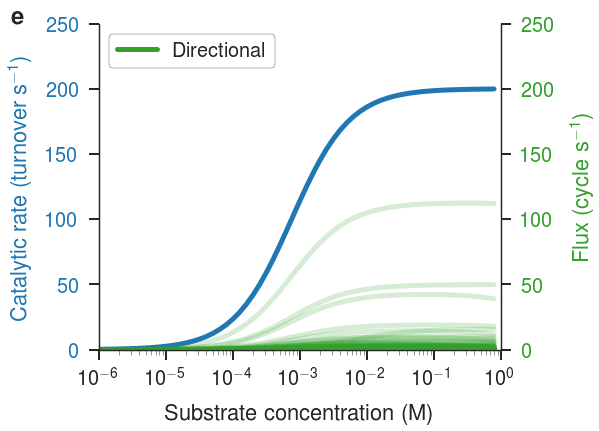

In [39]:
cmap = sns.color_palette("Paired", 10)
fig = plt.figure(figsize=(6 * 1.2, 6))
gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
ax1 = plt.subplot(gs[0, 0])

ax1.plot(concentrations, velocity, c=cmap[1])
ax1.set_xscale('log')
ax1.set_ylabel(r'Catalytic rate (turnover s$^{{-1}}$)', color=cmap[1])
ax1.set_ylim([0, 250])
ax2 = ax1.twinx()

for j in range(len(hiv_200_files)):
       ax2.plot(concentrations, [abs(i) for i in directional_fluxes[j]], c=cmap[3], alpha=0.2)

#ax2.plot([[i for i in list(concentrations)] for j in range(len(adk_files))], [[abs(i) for i in j] for j in directional_fluxes], c=cmap[3], alpha=1)
#ax2.plot([[i for i in list(concentrations)] for j in range(len(adk_files))], [[abs(i) for i in j] for j in directional_fluxes], c=cmap[3], ls='--', alpha=0.1)
ax2.set_ylabel('Flux (cycle s$^{{-1}}$)', color=cmap[3])
ax2.set_ylim([0, 250])
for tl in ax1.get_yticklabels():
    tl.set_color(cmap[1])
for tl in ax2.get_yticklabels():
    tl.set_color(cmap[3])
ax1.set_xlabel('Substrate concentration (M)')
for ax in fig.axes:
    ax.tick_params(which='major', direction='out', length=10, pad=10)
    ax.tick_params(which='minor', direction='out', length=5)
    ax.xaxis.set_tick_params(width=2)
    ax.yaxis.set_tick_params(width=2)
    ax.xaxis.set_ticks_position('bottom')
    ax.spines["top"].set_visible(False)
    ax.xaxis.labelpad = 15
    ax.yaxis.labelpad = 15
threshold_labels = ['Directional']
linestyles = ['-', '--']
colors = [cmap[3], cmap[3]]
handles, labels = ax.get_legend_handles_labels()
display = (0, 1, 2)
artists = []
if threshold_labels:
    for threshold_label, style, c in zip(threshold_labels, linestyles, colors):
        artists.append(plt.Line2D((0, 1), (0, 0), color=c, linestyle=style))
    ax.legend([handle for i, handle in enumerate(handles) if i in display] + artists,
              [label for i, label in enumerate(labels) if i in display] + threshold_labels,
              loc='upper left', frameon=True, framealpha=1.0, edgecolor='k')

ax1.set_xlim([10**-6, 10**0])
ax1.set_xticks([10**-6, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 10**0])
panel_label('e', panel_xoffset=-0.22, panel_yoffset=1.0)
fig.patch.set_facecolor('white')

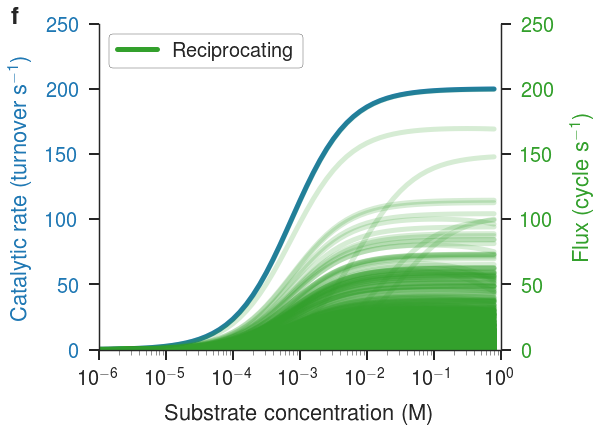

In [40]:

cmap = sns.color_palette("Paired", 10)
fig = plt.figure(figsize=(6 * 1.2, 6))
gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
ax1 = plt.subplot(gs[0, 0])

ax1.plot(concentrations, velocity, c=cmap[1])
ax1.set_xscale('log')
ax1.set_ylabel(r'Catalytic rate (turnover s$^{{-1}}$)', color=cmap[1])
ax1.set_ylim([0, 250])
ax2 = ax1.twinx()

for j in range(len(hiv_200_files)):
       ax2.plot(concentrations, [abs(i) for i in reciprocating_fluxes[j]], c=cmap[3], alpha=0.2)

ax2.set_ylabel('Flux (cycle s$^{{-1}}$)', color=cmap[3])
ax2.set_ylim([0, 250])
for tl in ax1.get_yticklabels():
    tl.set_color(cmap[1])
for tl in ax2.get_yticklabels():
    tl.set_color(cmap[3])
ax1.set_xlabel('Substrate concentration (M)')
for ax in fig.axes:
    ax.tick_params(which='major', direction='out', length=10, pad=10)
    ax.tick_params(which='minor', direction='out', length=5)
    ax.xaxis.set_tick_params(width=2)
    ax.yaxis.set_tick_params(width=2)
    ax.xaxis.set_ticks_position('bottom')
    ax.spines["top"].set_visible(False)
    ax.xaxis.labelpad = 15
    ax.yaxis.labelpad = 15
threshold_labels = ['Reciprocating']
linestyles = ['-', '--']
colors = [cmap[3], cmap[3]]
handles, labels = ax.get_legend_handles_labels()
display = (0, 1, 2)
artists = []
if threshold_labels:
    for threshold_label, style, c in zip(threshold_labels, linestyles, colors):
        artists.append(plt.Line2D((0, 1), (0, 0), color=c, linestyle=style))
    ax.legend([handle for i, handle in enumerate(handles) if i in display] + artists,
              [label for i, label in enumerate(labels) if i in display] + threshold_labels,
              loc='upper left', frameon=True, framealpha=1.0, edgecolor='k')
ax1.set_xlim([10**-6, 10**0])
ax1.set_xticks([10**-6, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 10**0])
panel_label('f', panel_xoffset=-0.22, panel_yoffset=1.0)
fig.patch.set_facecolor('white')

## Let's make this plot only show angles with high reciprocating flux and low directional flux.

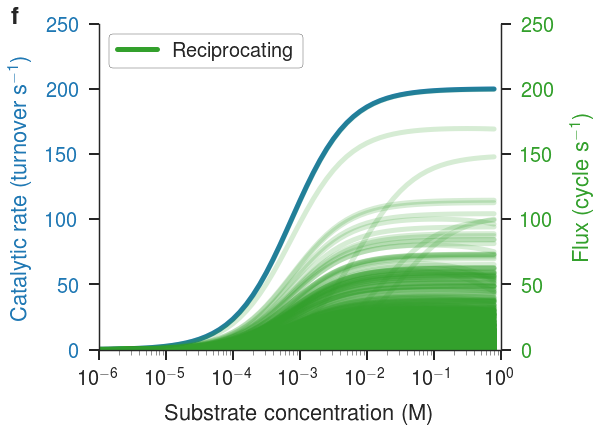

In [22]:

cmap = sns.color_palette("Paired", 10)
fig = plt.figure(figsize=(6 * 1.2, 6))
gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
ax1 = plt.subplot(gs[0, 0])

ax1.plot(concentrations, velocity, c=cmap[1])
ax1.set_xscale('log')
ax1.set_ylabel(r'Catalytic rate (turnover s$^{{-1}}$)', color=cmap[1])
ax1.set_ylim([0, 250])
ax2 = ax1.twinx()

for j in range(len(hiv_200_files)):
       directional_maximum = max([abs(i) for i in directional_fluxes[j]])
       ax2.plot(concentrations, [abs(i) for i in reciprocating_fluxes[j]], c=cmap[3], alpha=0.2)

ax2.set_ylabel('Flux (cycle s$^{{-1}}$)', color=cmap[3])
ax2.set_ylim([0, 250])
for tl in ax1.get_yticklabels():
    tl.set_color(cmap[1])
for tl in ax2.get_yticklabels():
    tl.set_color(cmap[3])
ax1.set_xlabel('Substrate concentration (M)')
for ax in fig.axes:
    ax.tick_params(which='major', direction='out', length=10, pad=10)
    ax.tick_params(which='minor', direction='out', length=5)
    ax.xaxis.set_tick_params(width=2)
    ax.yaxis.set_tick_params(width=2)
    ax.xaxis.set_ticks_position('bottom')
    ax.spines["top"].set_visible(False)
    ax.xaxis.labelpad = 15
    ax.yaxis.labelpad = 15
threshold_labels = ['Reciprocating']
linestyles = ['-', '--']
colors = [cmap[3], cmap[3]]
handles, labels = ax.get_legend_handles_labels()
display = (0, 1, 2)
artists = []
if threshold_labels:
    for threshold_label, style, c in zip(threshold_labels, linestyles, colors):
        artists.append(plt.Line2D((0, 1), (0, 0), color=c, linestyle=style))
    ax.legend([handle for i, handle in enumerate(handles) if i in display] + artists,
              [label for i, label in enumerate(labels) if i in display] + threshold_labels,
              loc='upper left', frameon=True, framealpha=1.0, edgecolor='k')
ax1.set_xlim([10**-6, 10**0])
ax1.set_xticks([10**-6, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 10**0])
panel_label('f', panel_xoffset=-0.22, panel_yoffset=1.0)
fig.patch.set_facecolor('white')